In [36]:
# Regression Neural Network

In [37]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [49]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(output_dim = 6, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(output_dim = 4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(output_dim = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=3, units=6)`
  """
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=4)`
  
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [51]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100)

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
173/173 [==============================] - 1s 4ms/step - loss: 0.7812 - accuracy: 0.0000e+00
Epoch 2/100
173/173 [==============================] - 0s 531us/step - loss: 0.6442 - accuracy: 0.0000e+00
Epoch 3/100
173/173 [==============================] - 0s 572us/step - loss: 0.5604 - accuracy: 0.0000e+00
Epoch 4/100
173/173 [==============================] - 0s 630us/step - loss: 0.5061 - accuracy: 0.0000e+00
Epoch 5/100
173/173 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.0000e+00
Epoch 6/100
173/173 [==============================] - 0s 835us/step - loss: 0.4471 - accuracy: 0.0000e+00
Epoch 7/100
173/173 [==============================] - 0s 687us/step - loss: 0.4268 - accuracy: 0.0000e+00
Epoch 8/100
173/173 [==============================] - 0s 761us/step - loss: 0.4122 - accuracy: 0.0000e+00
Epoch 9/100
173/173 [==============================] - 0s 786us/step - loss: 0.3986 - accuracy: 0.0000e+00
Epoch 10/100
173/173 [===================

173/173 [==============================] - 0s 578us/step - loss: 0.1941 - accuracy: 0.0000e+00
Epoch 77/100
173/173 [==============================] - 0s 531us/step - loss: 0.1933 - accuracy: 0.0000e+00
Epoch 78/100
173/173 [==============================] - 0s 572us/step - loss: 0.1932 - accuracy: 0.0000e+00
Epoch 79/100
173/173 [==============================] - 0s 552us/step - loss: 0.1921 - accuracy: 0.0000e+000s - loss: 0.1984 - accuracy: 0.0000e+
Epoch 80/100
173/173 [==============================] - 0s 664us/step - loss: 0.1912 - accuracy: 0.0000e+00
Epoch 81/100
173/173 [==============================] - 0s 595us/step - loss: 0.1901 - accuracy: 0.0000e+00
Epoch 82/100
173/173 [==============================] - 0s 520us/step - loss: 0.1897 - accuracy: 0.0000e+00
Epoch 83/100
173/173 [==============================] - 0s 572us/step - loss: 0.1893 - accuracy: 0.0000e+00
Epoch 84/100
173/173 [==============================] - 0s 485us/step - loss: 0.1871 - accuracy: 0.0000e+00
Epo

In [52]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [53]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [54]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

700605035.4267685

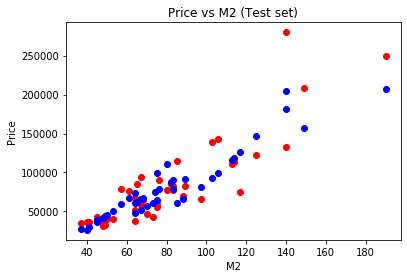

In [55]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat, 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()